# Loan Defaulters

## Introduction

* Your client is an Insurance company and they need your help in building a model to predict whether the policyholder (customer) will pay next premium on time or not.
* An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that you pay regularly to an insurance company for this guarantee.
* Building a model to predict whether a customer would make the premium payment can be extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers who are less likely to pay and convince them to continue making timely payment.
* Now, in order to predict, whether the customer would pay the next premium or not, you have information about past premium payment history for the policyholders along with their demographics (age, monthly income, area type) and sourcing channel etc.

## Data Catalog

| ﻿Variable                         | Definition                                                                                                         |
|----------------------------------|--------------------------------------------------------------------------------------------------------------------|
| id                               | Unique ID of the policy                                                                                            |
| perc_premium_paid_by_cash_credit | Percentage of premium amount paid by cash or credit card                                                           |
| age_in_days                      | Age in days of policy holder                                                                                       |
| Income                           | Monthly Income of policy holder                                                                                    |
| Count_3-6_months_late            | No of premiums late by 3 to 6 months                                                                               |
| Count_6-12_months_late           | No  of premiums late by 6 to 12 months                                                                             |
| Count_more_than_12_months_late   | No of premiums late by more than 12 months                                                                         |
| application_underwriting_score   | Underwriting Score of the applicant at the time of application (No applications under the score of 90 are insured) |
| no_of_premiums_paid              | Total premiums paid on time till now                                                                               |
| sourcing_channel                 | Sourcing channel for application                                                                                   |
| residence_area_type              | Area type of Residence (Urban/Rural)                                                                               |
| target                           | 1 - premium paid on time, 0 - otherwise                                                                            |


## Public and Private Split:

Public leaderboard is based on 40% of the policies, while private leaderboard will be evaluated on the remaining 60% of policies from the test dataset.  

## Data Importing

In [1]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# importing data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
# data shape
train.shape, test.shape

((79853, 12), (34224, 11))

In [4]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [5]:
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [6]:
train.columns, test.columns

(Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
        'Count_3-6_months_late', 'Count_6-12_months_late',
        'Count_more_than_12_months_late', 'application_underwriting_score',
        'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
        'target'],
       dtype='object'),
 Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
        'Count_3-6_months_late', 'Count_6-12_months_late',
        'Count_more_than_12_months_late', 'application_underwriting_score',
        'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
       dtype='object'))

In [7]:
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


## Univariate Analysis

### `perc_premium_paid_by_cash_credit`

Convert this into a percentage

In [8]:
train['percentage_premium_paid_cash_credit'] = train.perc_premium_paid_by_cash_credit.apply(lambda x: x * 100)
test['percentage_premium_paid_cash_credit'] = test.perc_premium_paid_by_cash_credit.apply(lambda x: x * 100)

In [9]:
train.percentage_premium_paid_cash_credit.describe(percentiles= [0,0.25,0.5,0.75,0.9,0.95,0.99,1])

count    79853.000000
mean        31.428774
std         33.491457
min          0.000000
0%           0.000000
25%          3.400000
50%         16.700000
75%         53.800000
90%         92.500000
95%        100.000000
99%        100.000000
100%       100.000000
max        100.000000
Name: percentage_premium_paid_cash_credit, dtype: float64

In [10]:
test.percentage_premium_paid_cash_credit.describe(percentiles= [0,0.25,0.5,0.75,0.9,0.95,0.99,1])

count    34224.000000
mean        31.445743
std         33.405873
min          0.000000
0%           0.000000
25%          3.400000
50%         16.900000
75%         54.000000
90%         92.000000
95%        100.000000
99%        100.000000
100%       100.000000
max        100.000000
Name: percentage_premium_paid_cash_credit, dtype: float64

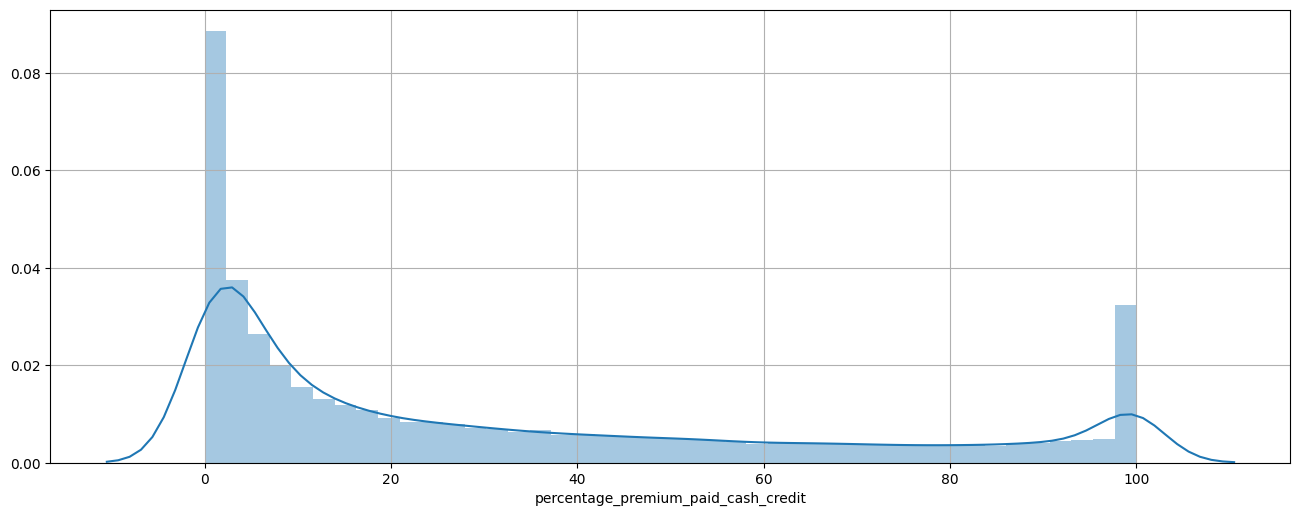

In [11]:
plt.figure(figsize=(16, 6),  dpi= 100)
sns.distplot(train.percentage_premium_paid_cash_credit)
plt.grid()
plt.show()

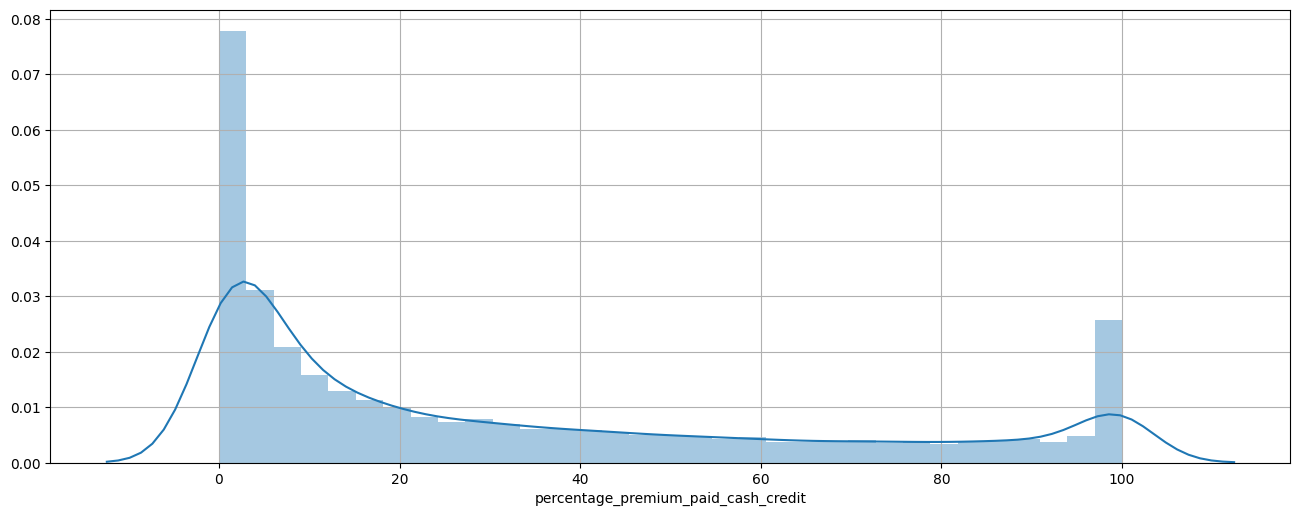

In [12]:
plt.figure(figsize=(16, 6),  dpi= 100)
sns.distplot(test.percentage_premium_paid_cash_credit)
plt.grid()
plt.show()

### `age_in_years`

In [13]:
train['age_in_years'] = train.age_in_days.apply(lambda x: x/365)
test['age_in_years'] = test.age_in_days.apply(lambda x: x/365)

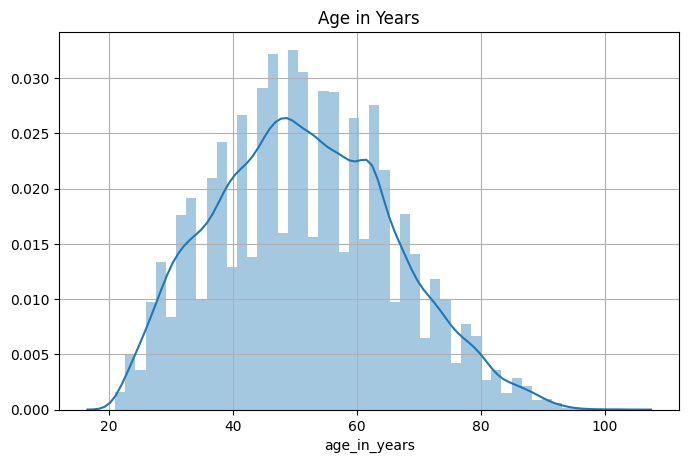

In [14]:
plt.figure(figsize=(8, 5), dpi= 100)
sns.distplot(train.age_in_years)
plt.title('Age in Years')
plt.grid()
plt.show()

## Treating Missing Values

In [15]:
train.isnull().sum()

id                                        0
perc_premium_paid_by_cash_credit          0
age_in_days                               0
Income                                    0
Count_3-6_months_late                    97
Count_6-12_months_late                   97
Count_more_than_12_months_late           97
application_underwriting_score         2974
no_of_premiums_paid                       0
sourcing_channel                          0
residence_area_type                       0
target                                    0
percentage_premium_paid_cash_credit       0
age_in_years                              0
dtype: int64

In [16]:
test.isnull().sum()

id                                        0
perc_premium_paid_by_cash_credit          0
age_in_days                               0
Income                                    0
Count_3-6_months_late                    31
Count_6-12_months_late                   31
Count_more_than_12_months_late           31
application_underwriting_score         1323
no_of_premiums_paid                       0
sourcing_channel                          0
residence_area_type                       0
percentage_premium_paid_cash_credit       0
age_in_years                              0
dtype: int64

We need to treat the following columns (both train and test sets) and remove their missing values:
1. `Count_3-6_months_late`
2. `Count_6-12_months_late`
3. `Count_more_than_12_months_late`
4. `application_underwriting_score`

### No. of Late Premiums

We can assume that any missing values in the `Count_3-6_months_late`, `Count_6-12_months_late`, `Count_more_than_12_months_late` are missing would mean that these customers have had no defaults in the past. 

In [17]:
# filling train data with 0s
train['Count_3-6_months_late'].fillna(0, inplace=True)
train['Count_6-12_months_late'].fillna(0, inplace=True)
train['Count_more_than_12_months_late'].fillna(0, inplace=True)

# filling test data with 0s
test['Count_3-6_months_late'].fillna(0, inplace=True)
test['Count_6-12_months_late'].fillna(0, inplace=True)
test['Count_more_than_12_months_late'].fillna(0, inplace=True)

### Application Underwriting Score

We can assume that this is similar to the credit score. A credit score is a numerical expression based on a level analysis of a person's credit files, to represent the creditworthiness of an individual.

Let us if this is an important factor when determining loan defaulters:

In [18]:
train[train['application_underwriting_score'].notnull()].corr()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target,percentage_premium_paid_cash_credit,age_in_years
id,1.000000,-0.004991,0.005107,0.001460,-0.005209,-0.002739,0.003453,-0.002124,-0.002450,-0.005517,-0.004991,0.005107
perc_premium_paid_by_cash_credit,-0.004991,1.000000,-0.251523,-0.037407,0.219189,0.211828,0.170251,-0.142670,-0.149822,-0.237376,1.000000,-0.251523
age_in_days,0.005107,-0.251523,1.000000,0.036552,-0.057125,-0.069429,-0.059597,0.049888,0.184278,0.092721,-0.251523,1.000000
Income,0.001460,-0.037407,0.036552,1.000000,-0.000857,-0.022187,-0.016297,0.085746,0.104532,0.020331,-0.037407,0.036552
Count_3-6_months_late,-0.005209,0.219189,-0.057125,-0.000857,1.000000,0.210438,0.294580,-0.082882,0.068010,-0.250534,0.219189,-0.057125
Count_6-12_months_late,-0.002739,0.211828,-0.069429,-0.022187,0.210438,1.000000,0.274270,0.004726,-0.091049,-0.288496,0.211828,-0.069429
Count_more_than_12_months_late,0.003453,0.170251,-0.059597,-0.016297,0.294580,0.274270,1.000000,-0.031783,-0.026595,-0.240787,0.170251,-0.059597
application_underwriting_score,-0.002124,-0.142670,0.049888,0.085746,-0.082882,0.004726,-0.031783,1.000000,-0.270864,0.068715,-0.142670,0.049888
no_of_premiums_paid,-0.002450,-0.149822,0.184278,0.104532,0.068010,-0.091049,-0.026595,-0.270864,1.000000,0.019851,-0.149822,0.184278
target,-0.005517,-0.237376,0.092721,0.020331,-0.250534,-0.288496,-0.240787,0.068715,0.019851,1.000000,-0.237376,0.092721


Application Underwriting Score seems to be weakly correlated with all variables, means we cannot replace it via any 

### Decision Tree Regression

We can use decision tree regression instead to replace `application_underwriting_scoring` missing values.

In [19]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  

In [20]:
# training set has no nan
underwriting_score_train = pd.concat([train[train['application_underwriting_score'].notnull()].drop('target', axis = 1), 
                                      test[test['application_underwriting_score'].notnull()]])

In [21]:
# dropping unnecessary columns
underwriting_score_train.drop(['perc_premium_paid_by_cash_credit', 'age_in_days'], axis = 1, inplace = True)

In [22]:
underwriting_score_train = pd.get_dummies(underwriting_score_train)

In [23]:
underwriting_score_training, underwriting_score_validation = train_test_split(underwriting_score_train, test_size=0.1)

In [24]:
underwriting_score_training_X = underwriting_score_training.drop('application_underwriting_score', axis = 1)
underwriting_score_training_Y = underwriting_score_training[['application_underwriting_score']]
underwriting_score_validation_X = underwriting_score_validation.drop('application_underwriting_score', axis = 1)
underwriting_score_validation_Y = underwriting_score_validation[['application_underwriting_score']]

In [25]:
regressor.fit(underwriting_score_training_X, underwriting_score_training_Y) 

DecisionTreeRegressor(random_state=0)

In [26]:
regressor.score(underwriting_score_training_X, underwriting_score_training_Y)

1.0

In [27]:
pred_Y = regressor.predict(underwriting_score_validation_X)

In [28]:
# defining a function which will return the rmse score
def rmse(y, y_):
    y = np.exp(y)
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [29]:
rmse(underwriting_score_validation_Y.to_numpy(), pred_Y)

1.0735806962844485

Now comparing this rmse with the mean of the values.

In [30]:
rmse(underwriting_score_validation_Y.to_numpy(), underwriting_score_training_Y.mean())

0.7372717896935976

Since the RMSE of the mean is lower, it is better to take the mean of the values instead.

In [31]:
train['application_underwriting_score'].fillna(train[train['application_underwriting_score'].notnull()]['application_underwriting_score'].mean(), inplace=True)
test['application_underwriting_score'].fillna(test[test['application_underwriting_score'].notnull()]['application_underwriting_score'].mean(), inplace=True)

## Bivariate Analysis

### All variables - Correlation Matrix

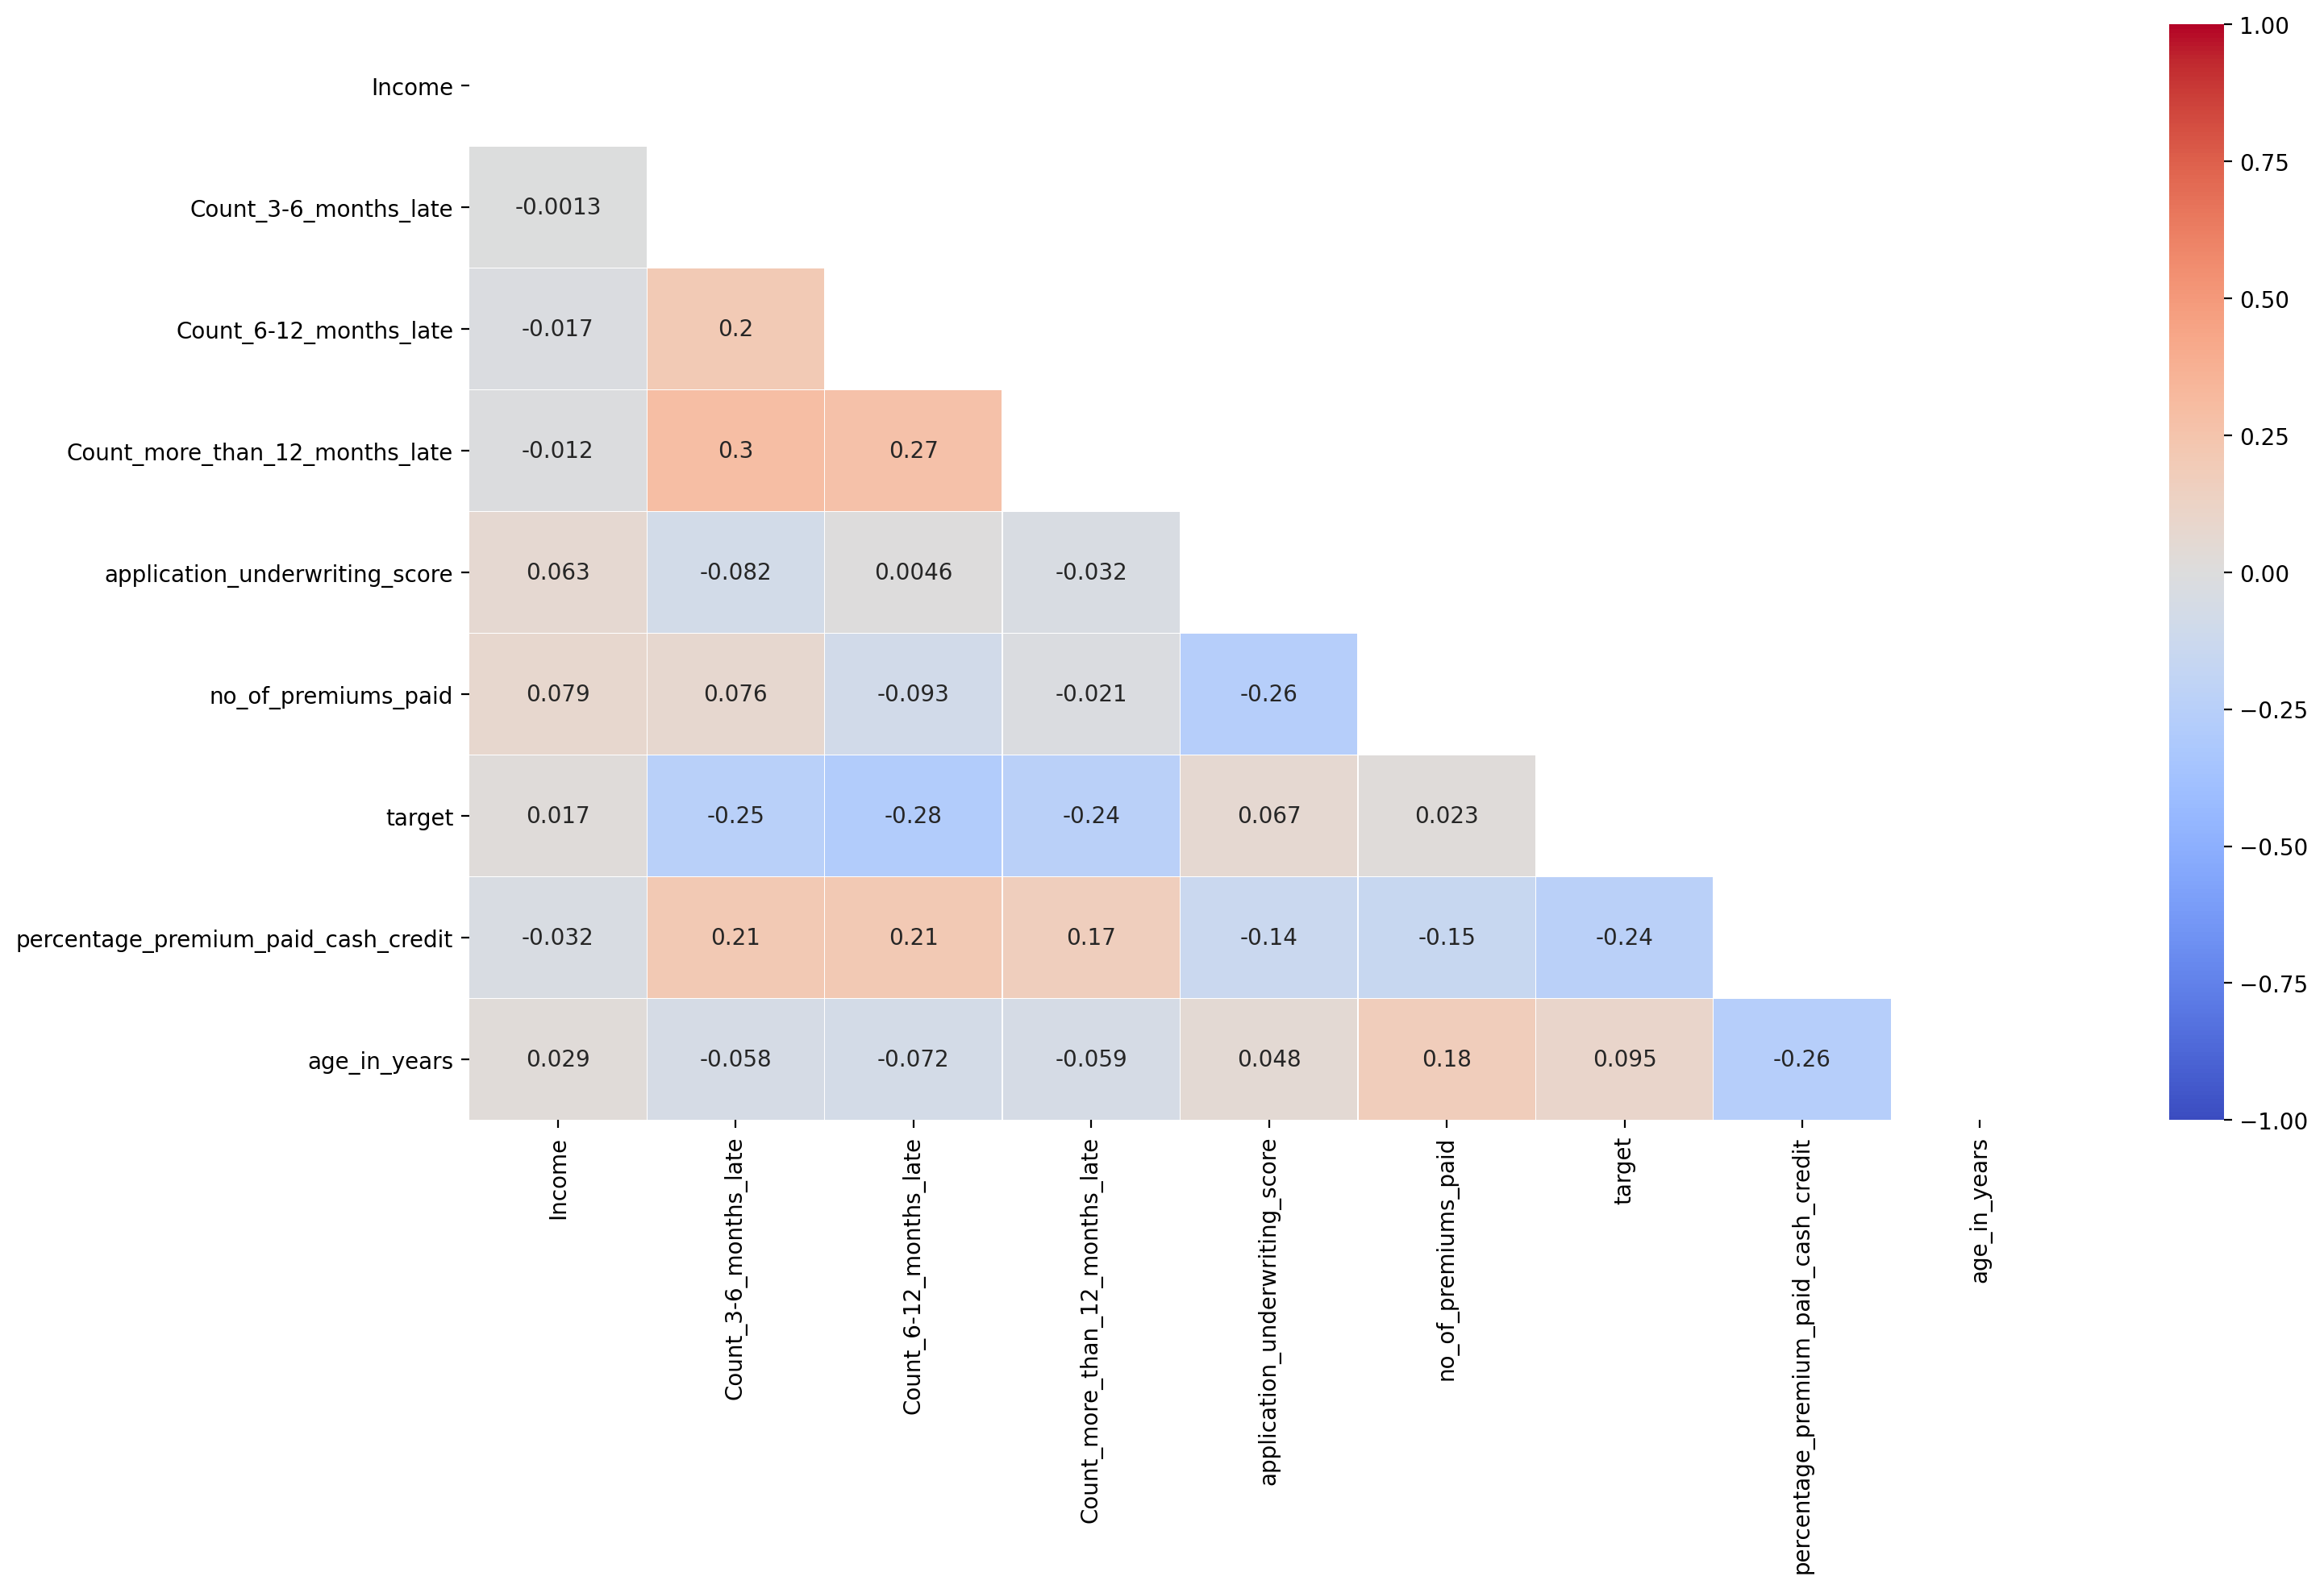

In [32]:
plt.figure(figsize=(16, 9), dpi = 200)
corr_plot = train.drop(['id','perc_premium_paid_by_cash_credit','age_in_days'], axis = 1).corr()
mask = np.zeros_like(corr_plot, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_plot,
            square=False, 
            linewidth=.1,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True,
            mask = mask)
plt.show()

### `percentage_premium_paid_cash_credit` vs `target`

The percentage premium paid in cash and credit seems to follow a bivariate distribution. This means that there are two major groups that exist. Let us see how the target variable performs in these splits. Assuming that the groups are divided at 85%.

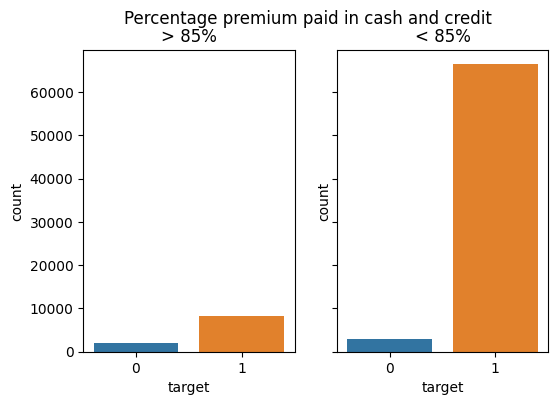

In [33]:
fig, ax = plt.subplots(1, 2, sharey='row', dpi = 100)
ax[0].set_title('> 85%')
sns.barplot(x = 'target', y = 'count', ax = ax[0],
            data = train[train.percentage_premium_paid_cash_credit > 85].groupby('target').nunique()['id'].reset_index().rename(
            columns = {'id': 'count'}))
ax[1].set_title('< 85%')
sns.barplot(x = 'target', y = 'count', ax = ax[1],
            data = train[train.percentage_premium_paid_cash_credit < 85].groupby('target').nunique()['id'].reset_index().rename(
            columns = {'id': 'count'}))
plt.suptitle('Percentage premium paid in cash and credit')
plt.show()

Group with less than 85% is a little more likely to default on a loan.

### `total_count_late` vs `target`

In [34]:
train['total_count_late'] = train['Count_more_than_12_months_late'] + train['Count_6-12_months_late'] + train['Count_3-6_months_late']
test['total_count_late'] = test['Count_more_than_12_months_late'] + test['Count_6-12_months_late'] + test['Count_3-6_months_late']

In [35]:
train[['total_count_late','target']].corr()

,total_count_late,target
total_count_late,1.000000,-0.353315
target,-0.353315,1.000000


### `perc_late_paid` vs `target`

In [36]:
train['perc_late_paid'] = train['total_count_late']/train['no_of_premiums_paid']
test['perc_late_paid'] = test['total_count_late']/test['no_of_premiums_paid']

In [37]:
train[['perc_late_paid','target']].corr()

,perc_late_paid,target
perc_late_paid,1.000000,-0.333177
target,-0.333177,1.000000


### Correlation Values (in order)

In [38]:
train.corr()['target'].sort_values()

total_count_late                      -0.353315
perc_late_paid                        -0.333177
Count_6-12_months_late                -0.284034
Count_3-6_months_late                 -0.246469
perc_premium_paid_by_cash_credit      -0.240980
percentage_premium_paid_cash_credit   -0.240980
Count_more_than_12_months_late        -0.238482
id                                    -0.005064
Income                                 0.016541
no_of_premiums_paid                    0.022664
application_underwriting_score         0.067333
age_in_days                            0.095103
age_in_years                           0.095103
target                                 1.000000
Name: target, dtype: float64

In [39]:
train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target', 'percentage_premium_paid_cash_credit', 'age_in_years',
       'total_count_late', 'perc_late_paid'],
      dtype='object')

In [40]:
train.shape

(79853, 16)

We will only use the top most correlated variables for our models.

## Splitting

In [41]:
train = pd.get_dummies(train)

In [42]:
test = pd.get_dummies(test)

In [43]:
training, validation = train_test_split(train, test_size=0.25, stratify=train['target'], random_state=1234)

In [44]:
x_train = training.drop(['id','target','perc_late_paid','perc_premium_paid_by_cash_credit','age_in_days'], axis=1)
y_train = training['target']
x_val = validation.drop(['id','target','perc_late_paid','perc_premium_paid_by_cash_credit','age_in_days'], axis=1)
y_val = validation['target']

In [45]:
X_test = test.drop(['id','perc_late_paid','perc_premium_paid_by_cash_credit','age_in_days'], axis=1)

In [46]:
x_train.columns

Index(['Income', 'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'percentage_premium_paid_cash_credit',
       'age_in_years', 'total_count_late', 'sourcing_channel_A',
       'sourcing_channel_B', 'sourcing_channel_C', 'sourcing_channel_D',
       'sourcing_channel_E', 'residence_area_type_Rural',
       'residence_area_type_Urban'],
      dtype='object')

In [47]:
x_train.shape

(59889, 16)

## Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

In [49]:
lreg.fit(x_train, y_train)

LinearRegression()

In [50]:
pred = lreg.predict(x_val)

In [51]:
rmse_test = rmse(pred, y_val)

In [52]:
rmse_test

0.13808491234069634

In [53]:
pred = lreg.predict(X_test)

In [54]:
submission = pd.DataFrame()

In [55]:
submission['id'] = test['id']
submission['target'] = pred

In [56]:
submission.to_csv('output/submission-Linear_Regression.csv', index = False)

## CatBoostRegressor

In [57]:
from catboost import CatBoostRegressor

In [58]:
cbr = CatBoostRegressor(max_depth=4, 
                        learning_rate=0.06900,
                        loss_function='RMSE',
                        n_estimators=500,
                        one_hot_max_size=2,
                        eval_metric='AUC',
                        boosting_type='Ordered',
                        random_seed=2405, 
                        use_best_model=True,
                        silent=True,
                        random_strength=1.0944250924022183,
                        reg_lambda=1.2762795426592872)

In [59]:
cbr.fit(x_train, y_train, eval_set=(x_val, y_val),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [60]:
prediction = cbr.predict(x_val)

In [61]:
rmse(y_val, prediction)

0.13682889527944514

In [62]:
pred = cbr.predict(X_test)

In [63]:
submission = pd.DataFrame()

In [64]:
submission['id'] = test['id']
submission['target'] = pred

In [65]:
submission.to_csv('output/submission-CatBoost.csv', index = False)

## XGBoost

In [66]:
import xgboost as xgb

In [67]:
xgc = xgb.XGBClassifier(
        n_estimators=10000,
        objective='binary:logistic',
        n_jobs=-1
    )

In [68]:
dtrain = xgb.DMatrix(x_train,label=y_train)
dtest = xgb.DMatrix(x_val)

In [69]:
#setting parameters for XGBoost
parameters={'max_depth':4, 
            'min_child_weight': 18, 
            'objective':'binary:logistic',
            'eval_metric':'auc',
            'learning_rate':0.0638840541928953,
            'subsample': 0.7642763922160356,
            'colsample_bytree': 0.5695032486938503,
            'reg_lambda': 98.64817753125035,}

In [70]:
num_round=100

In [71]:
xg = xgb.train(parameters,dtrain)

In [72]:
ypred = xg.predict(dtest)

In [73]:
rmse(y_val, ypred)

0.2189063383843703

In [74]:
dtest_final = xgb.DMatrix(X_test)

In [75]:
pred = xg.predict(dtest_final)

In [76]:
submission = pd.DataFrame()

In [77]:
submission['id'] = test['id']
submission['target'] = pred

In [78]:
submission.to_csv('output/submission-XGBoost.csv', index = False)

## LightGBM

In [81]:
import lightgbm as lgb

In [82]:
train_data = lgb.Dataset(x_train,label=y_train)

In [83]:
#setting parameters for lightgbm
param = {'num_leaves':150, 
         'objective':'binary',
         'max_depth':5,
         'learning_rate':0.08935941285353541,
         'max_bin':200, 
         'min_child_weight': 20, 
         'min_child_samples': 50, 
         'subsample': 0.5, 
         'colsample_bytree': 0.7521854644030728, 
         'scale_pos_weight': 1.0, 
         'reg_lambda': 100.0}
param['metric'] = ['auc', 'binary_logloss']

num_round = 50
lgbm=lgb.train(param,train_data,num_round)

In [84]:
ypred = lgbm.predict(x_val)

In [85]:
rmse(y_val, ypred)

0.13682828822440432

In [86]:
pred = lgbm.predict(X_test)

In [87]:
submission = pd.DataFrame()

In [88]:
submission['id'] = test['id']
submission['target'] = pred

In [89]:
submission.to_csv('output/submission-LightGBM.csv', index = False)

Submitting `submission-CatBoost.csv`, since catboost seems to be performing the best.